In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

In [72]:
df_dashboard = pd.read_csv('data/category_dashboard.csv')
df_dashboard.head()

,slug,Smart_contract,owner,owned_asset_count,Category,N_slug,is_true_category
0,cryptokitties,0x06012c8cf97bead5deae237070f9587f8e7a266d,0x8Ec64195A860Fba2e5B01DF2b6793f2641bD8903,1.0,Art,1.0,True
1,rarible,0xc9154424b823b10579895ccbe442d41b9abd96ed,0x8560f3AA7C2522bFEabCa88Bb8f5F55eFe9611fe,1.0,Art,6.0,True
2,superrare,0x8c9f364bf7a56ed058fc63ef81c6cf09c833e656,0x9F390953BA31bb521A650Fa736B726d72Cdf2c41,1.0,Art,4.0,True
3,rarible,0xb66a603f4cfe17e3d27b87a8bfcad319856518b8,0xB9C4fd82A47dF3B5864266A293a3516D484590b9,1.0,Art,6.0,True
4,rarible,0xc9154424b823b10579895ccbe442d41b9abd96ed,0x0cEC1Dbc5Db276dE35808bf717a4491082fDb8d8,5.0,Art,30.0,True


In [76]:
df_dashboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6786319 entries, 0 to 6786318
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   slug               object 
 1   Smart_contract     object 
 2   owner              object 
 3   owned_asset_count  float64
 4   Category           object 
 5   N_slug             float64
 6   is_true_category   bool   
dtypes: bool(1), float64(2), object(4)
memory usage: 317.1+ MB


In [86]:
x = (
    df_dashboard
    .groupby('slug')
    .agg(
        N = ('owner', 'count'),
        is_known_category = ('is_true_category', 'sum'),
        category = ('Category', 'first')
    )
    .sort_values('N', ascending = False)
    .reset_index()
)
x

,slug,N,is_known_category,category
0,ens,164169,164169,Other
1,merge-regenesis,51496,0,Unknown
2,uniswap-v3-positions,35028,0,Unknown
3,rarible,30907,30907,Art
4,zapper-season-2,28785,0,Unknown
...,...,...,...,...
198230,masterpiece10101,1,0,Unknown
198231,masterpiece-xknqke7btc,1,0,Unknown
198232,masterpiece-row-tales-of-the-cryptoe,1,0,Unknown
198233,masterpiece-of-xkm-027,1,0,Unknown


In [98]:
x.head(20)

,slug,N,is_known_category,category
0,ens,164169,164169,Other
1,merge-regenesis,51496,0,Unknown
2,uniswap-v3-positions,35028,0,Unknown
3,rarible,30907,30907,Art
4,zapper-season-2,28785,0,Unknown
5,proof-of-stake-pages,27124,0,Unknown
6,syndicate-genesis,24792,0,Unknown
7,rabbithole-credentials-daos,21319,0,Unknown
8,zerion-dna-onepointo,20974,0,Unknown
9,zapper-fi,20815,0,Unknown


In [92]:
y = x.loc[lambda x: x.category != 'Unknown'].head(20)
y

,slug,N,is_known_category,category
0,ens,164169,164169,Other
3,rarible,30907,30907,Art
14,zora,16762,16762,Other
19,parallelalpha,14303,14303,Collectible
26,the-sandbox-assets,10584,10584,Metaverse
31,poap-v2,8916,8916,Other
33,cryptokitties,8629,8629,Art
37,unstoppable-domains,7406,7406,Utility
41,fnd,5924,5924,Art
48,known-origin,5593,5593,Art


In [99]:
100 * y.N.sum() / x.N.sum()

4.477803062308153

In [125]:
x.set_index('slug').loc[:, ['category']].head(20).to_csv('data/top20_NFT.csv')

In [124]:
y.drop_duplicates('category').reset_index().rename(columns = {'index': 'topN'}).loc[:, ['topN', 'slug', 'N', 'category']]

,topN,slug,N,category
0,0,ens,164169,Other
1,3,rarible,30907,Art
2,19,parallelalpha,14303,Collectible
3,26,the-sandbox-assets,10584,Metaverse
4,37,unstoppable-domains,7406,Utility
5,74,megacryptopolis,3875,Games


# Raw log

In [17]:
import pandas as pd

In [18]:
import io, os
import re

In [19]:
with io.open('openSea_NFT.log', mode = 'r', encoding='utf-8') as f:
    lines = f.readlines()
print(len(lines))
for i, x in enumerate(lines):
    print(x)
    if i == 20:
        break

242
INFO:root:             Art  Collectible  Games  Metaverse  Other  Utility

Art           10            6      0          0     60        0

Collectible    2            8      2          1     57        0

Games          1            5     21          0     46        0

Metaverse      2            6      4          2     21        0

Other          1            7      8          0    198        0

Utility        1            0      0          0      6        0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

# Overall statistics

In [20]:
lines_used = list(filter(lambda x: 'Iteration-' in x, lines))
data = []
for line in list(map(lambda x: x.split('root:')[-1].split('\n')[0].split('|'), lines_used)):
    data.append(dict(map(lambda x: x.strip().split('-'), line)))
pd.DataFrame(data)

,Iteration,correct,threshold,known,unknown,N_added
0,0,50.32,0.1,475,406,406
1,1,54.87,0.1,780,1294,902
2,2,57.57,0.1,1030,2917,1649
3,3,57.31,0.1,1183,4590,1683
4,4,57.87,0.1,1296,6345,1787
5,5,58.53,0.1,1343,7653,1308
6,6,58.21,0.1,1388,8964,1320
7,7,58.49,0.1,1460,10213,1256
8,8,58.08,0.1,1486,11172,952
9,9,57.00,0.1,1500,12249,1075


# Confusion matrix

In [21]:
def is_selected(x):
    if 'INFO:root:             Art  Collectible  Games  Metaverse  Other  Utility' in x:
        return True
    if re.match('\s*[A-Z][a-z]+\s+\d{1,3}\s+', x):
        return True
    return False
lines_used = list(filter(is_selected, lines))

collector = []
data = []
for line in lines_used:
    x = re.split('\s+', line.strip())
    if ('INFO:root:' in x) and  (len(data) == 6):
        collector.append(data)
        data = []
        continue
    if ('INFO:root:' not in x) and (len(x) == 7):
        data.append(x)

In [22]:
dfs = []
for N_iter, data in enumerate(collector):
    df = (
        pd.DataFrame(data, columns = ['Category', 'Art', 'Collectible', 'Games', 'Metaverse', 'Other', 'Utility'])
        .set_index('Category')
        .astype(float)
    )
    dfs.append(df)
    print(f'Iteration {N_iter}')
    df.pipe(display)

Iteration 0


,Art,Collectible,Games,Metaverse,Other,Utility
Category,,,,,,
Art,10.0,6.0,0.0,0.0,60.0,0.0
Collectible,2.0,8.0,2.0,1.0,57.0,0.0
Games,1.0,5.0,21.0,0.0,46.0,0.0
Metaverse,2.0,6.0,4.0,2.0,21.0,0.0
Other,1.0,7.0,8.0,0.0,198.0,0.0
Utility,1.0,0.0,0.0,0.0,6.0,0.0


Iteration 1


,Art,Collectible,Games,Metaverse,Other,Utility
Category,,,,,,
Art,14.0,5.0,2.0,0.0,99.0,0.0
Collectible,2.0,17.0,3.0,1.0,76.0,0.0
Games,0.0,6.0,39.0,1.0,53.0,0.0
Metaverse,5.0,7.0,5.0,3.0,33.0,0.0
Other,10.0,15.0,19.0,1.0,355.0,0.0
Utility,3.0,0.0,0.0,1.0,5.0,0.0


Iteration 2


,Art,Collectible,Games,Metaverse,Other,Utility
Category,,,,,,
Art,25.0,4.0,2.0,0.0,129.0,0.0
Collectible,6.0,17.0,4.0,1.0,88.0,0.0
Games,1.0,9.0,49.0,0.0,55.0,0.0
Metaverse,7.0,8.0,7.0,2.0,39.0,0.0
Other,16.0,19.0,28.0,5.0,500.0,0.0
Utility,1.0,1.0,0.0,1.0,6.0,0.0


Iteration 3


,Art,Collectible,Games,Metaverse,Other,Utility
Category,,,,,,
Art,26.0,5.0,3.0,0.0,153.0,0.0
Collectible,7.0,19.0,4.0,1.0,96.0,0.0
Games,4.0,8.0,51.0,0.0,60.0,0.0
Metaverse,14.0,4.0,6.0,7.0,38.0,1.0
Other,28.0,25.0,34.0,5.0,575.0,0.0
Utility,1.0,1.0,0.0,0.0,7.0,0.0


Iteration 4


,Art,Collectible,Games,Metaverse,Other,Utility
Category,,,,,,
Art,36.0,3.0,4.0,0.0,157.0,0.0
Collectible,9.0,20.0,8.0,3.0,94.0,0.0
Games,8.0,11.0,57.0,0.0,56.0,0.0
Metaverse,16.0,3.0,6.0,11.0,36.0,0.0
Other,41.0,31.0,45.0,5.0,626.0,1.0
Utility,3.0,0.0,0.0,0.0,6.0,0.0


Iteration 5


,Art,Collectible,Games,Metaverse,Other,Utility
Category,,,,,,
Art,44.0,2.0,2.0,0.0,159.0,0.0
Collectible,9.0,19.0,11.0,4.0,94.0,0.0
Games,13.0,11.0,65.0,0.0,45.0,0.0
Metaverse,16.0,4.0,7.0,10.0,35.0,0.0
Other,50.0,33.0,47.0,5.0,648.0,1.0
Utility,4.0,0.0,0.0,0.0,5.0,0.0


Iteration 6


,Art,Collectible,Games,Metaverse,Other,Utility
Category,,,,,,
Art,56.0,1.0,3.0,0.0,154.0,0.0
Collectible,11.0,21.0,10.0,4.0,92.0,1.0
Games,15.0,9.0,70.0,2.0,38.0,0.0
Metaverse,20.0,6.0,6.0,12.0,28.0,0.0
Other,68.0,40.0,53.0,8.0,649.0,2.0
Utility,3.0,0.0,0.0,0.0,6.0,0.0


Iteration 7


,Art,Collectible,Games,Metaverse,Other,Utility
Category,,,,,,
Art,77.0,3.0,3.0,0.0,144.0,0.0
Collectible,14.0,31.0,11.0,4.0,82.0,1.0
Games,20.0,10.0,67.0,2.0,36.0,0.0
Metaverse,14.0,6.0,7.0,15.0,30.0,0.0
Other,97.0,41.0,57.0,13.0,664.0,2.0
Utility,4.0,0.0,0.0,0.0,5.0,0.0


Iteration 8


,Art,Collectible,Games,Metaverse,Other,Utility
Category,,,,,,
Art,86.0,3.0,2.0,0.0,137.0,0.0
Collectible,19.0,28.0,11.0,3.0,83.0,1.0
Games,21.0,11.0,71.0,4.0,29.0,0.0
Metaverse,17.0,5.0,7.0,17.0,26.0,0.0
Other,120.0,43.0,56.0,14.0,661.0,2.0
Utility,4.0,0.0,0.0,0.0,5.0,0.0


# Precision & Recall

In [23]:
def is_selected(x):
    if '              precision    recall  f1-score   support' in x:
        return True
    if re.match('\s+[A-Z][a-z]+\s+\d\.\d{2}\s+', x):
        return True
    return False
lines_used = list(filter(is_selected, lines))
lines_used
collector = []
data = []
for line in lines_used:
    x = re.split('\s+', line.strip())
    if (len(x) == 4) and (len(data) == 6):
        collector.append(data)
        data = []
        continue
    if len(x) == 5:
        data.append(x)

In [24]:
dfs = []
for N_iter, data in enumerate(collector):
    df = (
        pd.DataFrame(data, columns = ['Category', 'precision', 'recall', 'f1-score', 'support'])
        .set_index('Category')
        .astype(float)
    )
    dfs.append(df)
    print(f'Iteration {N_iter}')
    df.pipe(display)

Iteration 0


,precision,recall,f1-score,support
Category,,,,
Art,0.59,0.13,0.22,76.0
Collectible,0.25,0.11,0.16,70.0
Games,0.60,0.29,0.39,73.0
Metaverse,0.67,0.06,0.11,35.0
Other,0.51,0.93,0.66,214.0
Utility,0.00,0.00,0.00,7.0


Iteration 1


,precision,recall,f1-score,support
Category,,,,
Art,0.41,0.12,0.18,120.0
Collectible,0.34,0.17,0.23,99.0
Games,0.57,0.39,0.47,99.0
Metaverse,0.43,0.06,0.10,53.0
Other,0.57,0.89,0.70,400.0
Utility,0.00,0.00,0.00,9.0


Iteration 2


,precision,recall,f1-score,support
Category,,,,
Art,0.45,0.16,0.23,160.0
Collectible,0.29,0.15,0.20,116.0
Games,0.54,0.43,0.48,114.0
Metaverse,0.22,0.03,0.06,63.0
Other,0.61,0.88,0.72,568.0
Utility,0.00,0.00,0.00,9.0


Iteration 3


,precision,recall,f1-score,support
Category,,,,
Art,0.33,0.14,0.19,187.0
Collectible,0.31,0.15,0.20,127.0
Games,0.52,0.41,0.46,123.0
Metaverse,0.54,0.10,0.17,70.0
Other,0.62,0.86,0.72,667.0
Utility,0.00,0.00,0.00,9.0


Iteration 4


,precision,recall,f1-score,support
Category,,,,
Art,0.32,0.18,0.23,200.0
Collectible,0.29,0.15,0.20,134.0
Games,0.47,0.43,0.45,132.0
Metaverse,0.58,0.15,0.24,72.0
Other,0.64,0.84,0.73,749.0
Utility,0.00,0.00,0.00,9.0


Iteration 5


,precision,recall,f1-score,support
Category,,,,
Art,0.32,0.21,0.26,207.0
Collectible,0.28,0.14,0.18,137.0
Games,0.49,0.49,0.49,134.0
Metaverse,0.53,0.14,0.22,72.0
Other,0.66,0.83,0.73,784.0
Utility,0.00,0.00,0.00,9.0


Iteration 6


,precision,recall,f1-score,support
Category,,,,
Art,0.32,0.26,0.29,214.0
Collectible,0.27,0.15,0.19,139.0
Games,0.49,0.52,0.51,134.0
Metaverse,0.46,0.17,0.24,72.0
Other,0.67,0.79,0.73,820.0
Utility,0.00,0.00,0.00,9.0


Iteration 7


,precision,recall,f1-score,support
Category,,,,
Art,0.34,0.34,0.34,227.0
Collectible,0.34,0.22,0.26,143.0
Games,0.46,0.50,0.48,135.0
Metaverse,0.44,0.21,0.28,72.0
Other,0.69,0.76,0.72,874.0
Utility,0.00,0.00,0.00,9.0


Iteration 8


,precision,recall,f1-score,support
Category,,,,
Art,0.32,0.38,0.35,228.0
Collectible,0.31,0.19,0.24,145.0
Games,0.48,0.52,0.50,136.0
Metaverse,0.45,0.24,0.31,72.0
Other,0.70,0.74,0.72,896.0
Utility,0.00,0.00,0.00,9.0


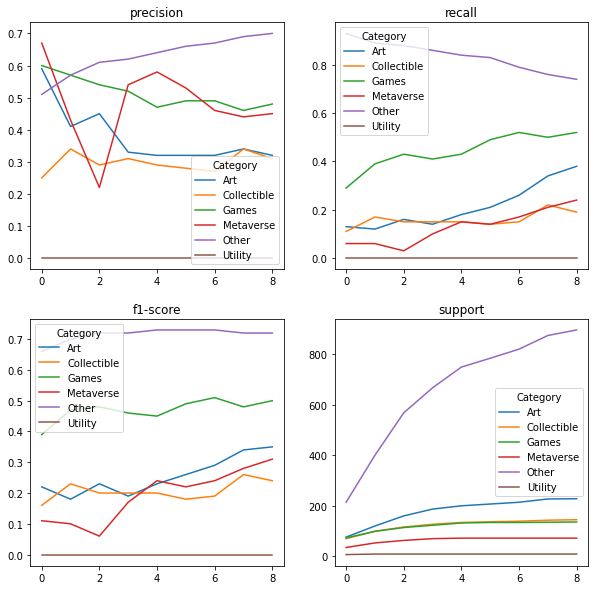

In [70]:
ncols = 2
fig, axes = plt.subplots(nrows=2, ncols=ncols, figsize = (10, 10))
for idx, metrics in enumerate(dfs[0].columns):
    df = pd.concat(list(map(lambda x: x[metrics], dfs)), axis = 1).T.reset_index(drop=True)
    df.plot(title = metrics, ax = axes[idx // ncols, idx % ncols])

# Games

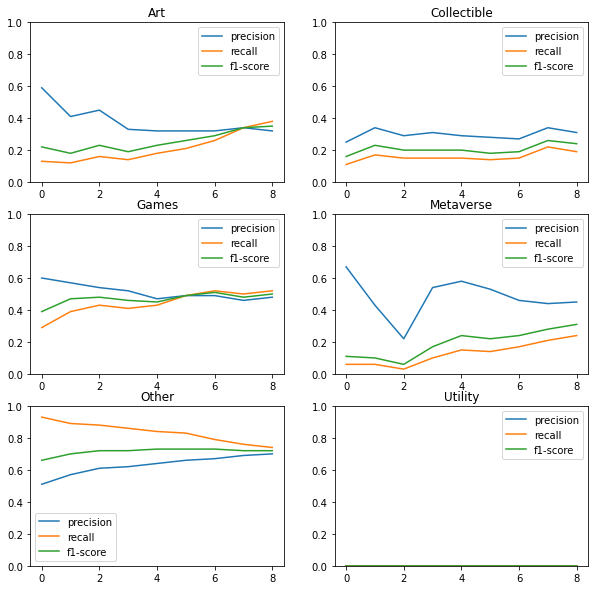

In [57]:
ncols = 2
fig, axes = plt.subplots(nrows=3, ncols=ncols, figsize = (10, 10))
for idx, category in enumerate(dfs[0].index.tolist()):
    df = pd.concat(list(map(lambda x: x.loc[category,], dfs)), axis = 1).T.reset_index(drop = True)
    df.loc[:, ['precision', 'recall', 'f1-score']].plot(title = category, ylim = (0, 1), ax = axes[idx // ncols, idx % ncols])